In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

In [13]:
# Missing value Treatment for training set.
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [12]:
# Missing values treatment for test set.
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [14]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Thus there is no more empty records for both training or test sets.

## Outlier Treatment

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


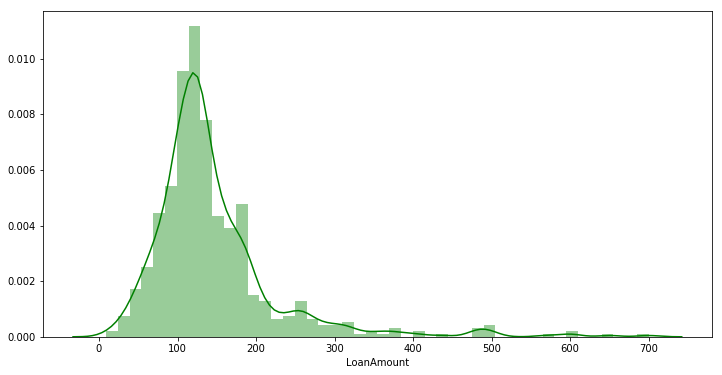

In [18]:
plt.figure(1, figsize=(12,6))
sb.distplot(a=train['LoanAmount'], color = 'green');

We can see that the distribution is right skewed. We can use skewness by using log transformation.

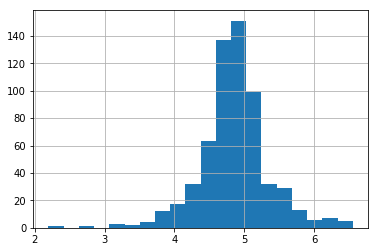

In [20]:
train['LoanAmt_log'] = np.log(train['LoanAmount'])
train['LoanAmt_log'].hist(bins=20);

In [21]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


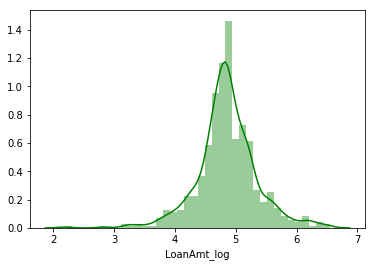

In [27]:
sb.distplot(a=train['LoanAmt_log'],color='green');

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


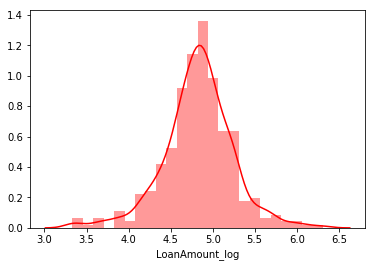

In [26]:
sb.distplot(a=test['LoanAmount_log'],color = 'red')

In [29]:
# Drop the loan_ID as there is no effect of that column.
train.drop('Loan_ID',axis=1, inplace=True)
test.drop('Loan_ID',axis=1, inplace=True)

### Now comes the modelling part
As the ScikitLearn library needs the Target Variable in a different variable, we will split the dataset into required columns(predictor columns) and target column.

In [32]:
X = train.drop('Loan_Status',axis=1)
Y = train.Loan_Status

In [34]:
X=pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size=0.3)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
pred_cv  = model.predict(x_cv)

In [39]:
accuracy_score(y_cv, pred_cv)

0.7513513513513513

In [40]:
pred_test = model.predict(test)

SyntaxError: invalid syntax (<ipython-input-42-17f1c3e7f450>, line 4)

SyntaxError: invalid syntax (<ipython-input-43-44968cc46c1a>, line 1)